## Part 1 - Data Analysis and Bayes Nets

### 1) Data Visualization and Exploration

Importing the required libraries and checking for the python version.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3,5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import pandas as pd
import os
import cv2  # OpenCV Python library for computer vision

# to make this notebook's output stable across runs
np.random.seed(42)

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import random

Loading only the training set for Part 1 of the coursework

In [7]:
CW_DATASET_PATH = "CW_dataset"

def load_train_data(dataset_path=CW_DATASET_PATH):
    x_train_all_path = os.path.join(dataset_path, "x_train_all.csv")
    y_train_all_path = os.path.join(dataset_path, "y_train_all.csv")

    x_train_all = pd.read_csv(x_train_all_path)
    y_train_all = pd.read_csv(y_train_all_path)

    return x_train_all, y_train_all

In [8]:
x_train, y_train = load_train_data()

Analysing the dataset

In [9]:
#Checking the shape of the data
x_train.shape

(9690, 2304)

In [10]:
y_train.shape

(9690, 1)

In [11]:
#Displaying the first 5 rows of the dataset
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,87.0,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,96.0,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,98.0,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,112.0,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,100.0,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0


In [12]:
y_train.head()

,0
0,0
1,0
2,0
3,0
4,0


In [13]:
#Checking for missing values
x_train.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           0      1      2      3      4      5      6      7      8      9  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  False  False  False  False  False  False  False  False  False  False   
9686  False  False  False  False  False  False  False  False  False  False   
9687  False  False  False  False  False  False  False  False  False  False   
9688  False  False  False  False  False  False  False  False  False  False   
9689  False  False  False  False  False  False  False  False  False  False   

 

In [14]:
y_train.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           0
0     False
1     False
2     False
3     False
4     False
...     ...
9685  False
9686  False
9687  False
9688  False
9689  False

[9690 rows x 1 columns]>

In [15]:
#To check if there are any missing values in the data frame
x_train.isna().any().any()

False

In [16]:
y_train.isna().any().any()

False

In [17]:
# Get a summary of the dataset using describe
x_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
count,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,...,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.000000,9690.00000,9690.000000,9690.000000,9690.000000
mean,89.658514,89.545201,89.343756,89.566770,89.812590,89.853251,89.883282,89.978431,90.170175,90.519092,...,72.234881,71.833437,71.394118,70.572136,69.660165,68.878638,68.29453,67.831889,67.548297,67.393189
std,77.521341,77.430539,77.350452,77.498754,77.437292,77.279125,77.085714,77.081732,77.062371,77.155644,...,65.369022,65.439225,65.402298,65.144238,64.885963,64.530366,64.27455,63.799350,63.437102,63.506304
min,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.00000,5.000000,4.000000,4.000000
25%,32.000000,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,33.000000,33.000000,33.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,25.00000,25.000000,25.000000,25.000000
50%,57.000000,58.000000,57.000000,58.000000,58.000000,58.000000,58.000000,58.000000,59.000000,59.000000,...,46.000000,46.000000,46.000000,45.000000,45.000000,44.000000,44.00000,43.000000,43.000000,43.000000
75%,126.000000,124.000000,122.750000,123.000000,125.000000,123.750000,124.000000,124.000000,124.000000,126.000000,...,95.000000,93.000000,91.000000,88.000000,86.000000,84.000000,82.00000,82.000000,81.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000,255.000000,255.000000,255.000000


In [18]:
y_train.describe()

,0
count,9690.000000
mean,3.148607
std,2.177158
min,0.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,9.000000


In [19]:
label_counts = y_train['0'].value_counts().sort_index()
label_counts

0     210
1    2220
2    2250
3    1410
4    1980
5     210
6     360
7     240
8     540
9     270
Name: 0, dtype: int64

Visualising the dataset using graphs

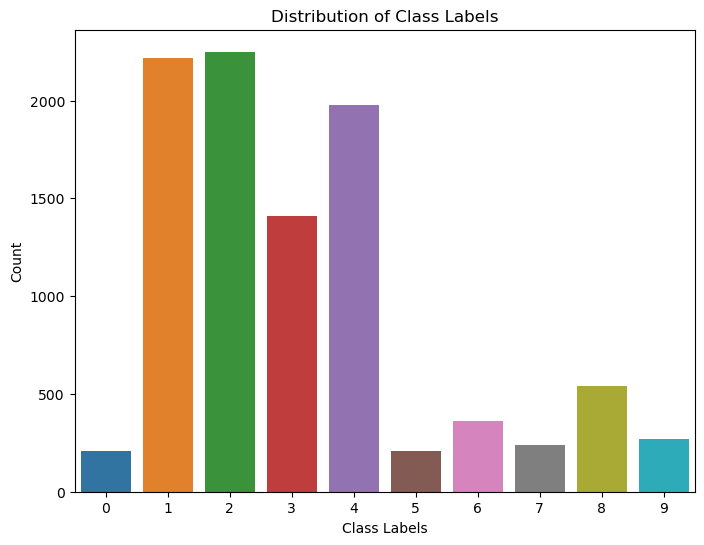

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='0', data=y_train)
plt.title("Distribution of Class Labels")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.show()

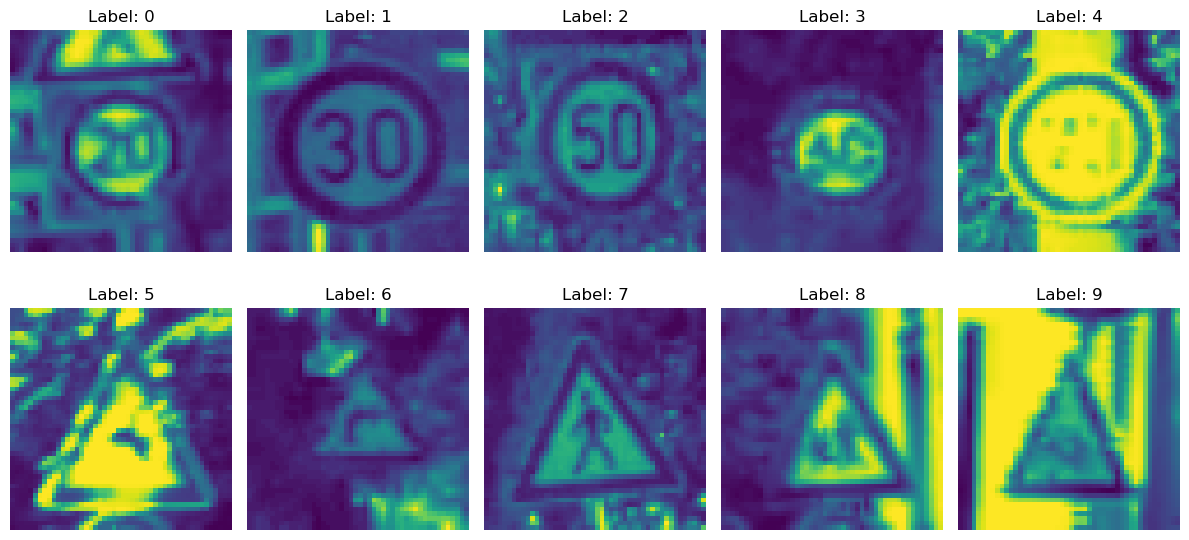

In [21]:
# To display one image for each label

# Initialize a dictionary to store one image for each label
label_images = {}

# Iterate through the rows of the DataFrames and find one image for each label
for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]  
    
    if label not in label_images:
        # Store the first image for each unique label
        label_images[label] = row.values.reshape(48, 48)  
    
    # Break the loop if we have found one image for each unique label
    if len(label_images) == 10:
        break

# Display the images
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
for i, (label, image) in enumerate(label_images.items()):
    r, c = divmod(i, 5)
    axs[r, c].imshow(image)
    axs[r, c].set_title(f'Label: {label}')
    axs[r, c].axis('off')

plt.tight_layout()
plt.show()

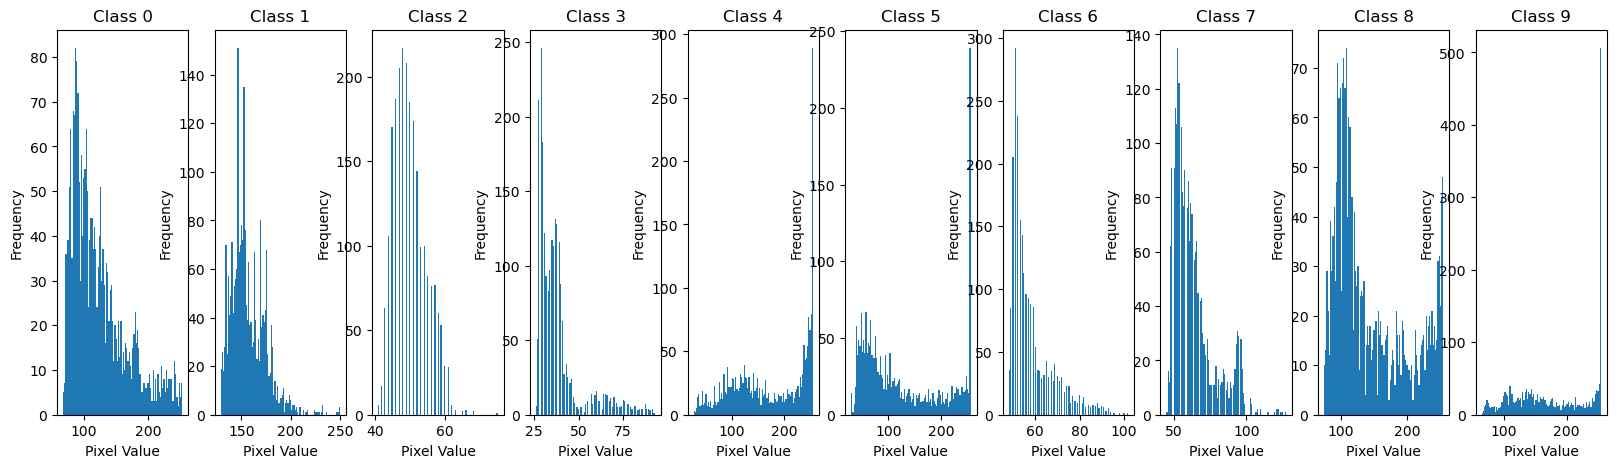

In [22]:
import matplotlib.pyplot as plt

unique_class_labels = y_train['0'].unique()

fig, axes = plt.subplots(1, len(unique_class_labels), figsize=(20, 5))

for i, class_label in enumerate(unique_class_labels):
    # Select a representative image for each class
    class_images = x_train[y_train['0'] == class_label]
    
    if not class_images.empty:
        representative_image = class_images.iloc[0, :-1].values
        
        # Plot the histogram for the representative image of each class
        axes[i].hist(representative_image, bins=100)
        axes[i].set_title(f'Class {class_label}')
        axes[i].set_xlabel("Pixel Value")
        axes[i].set_ylabel("Frequency")

plt.show()


# Box Plots

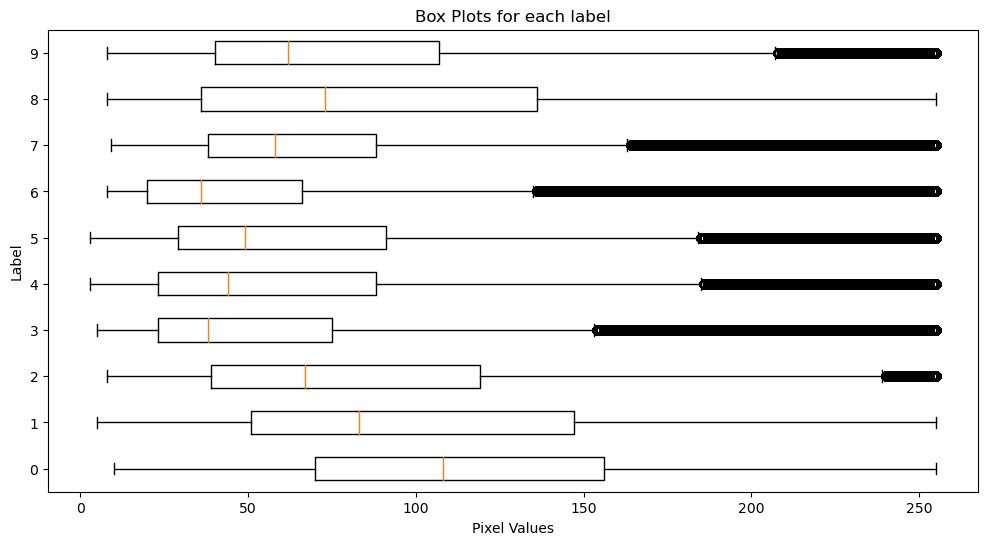

Label 0: 210 images
Label 1: 2220 images
Label 2: 2250 images
Label 3: 1410 images
Label 4: 1980 images
Label 5: 210 images
Label 6: 360 images
Label 7: 240 images
Label 8: 540 images
Label 9: 270 images


In [23]:
# store image data for each label
label_images = {}

# just to check if all images are being plotted
num_images_per_label = {}

for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]  
    image_data = row.values.reshape(-1, 48, 48) 

    if label not in label_images:
        label_images[label] = []
    
    # add image data to associated labels
    label_images[label].append(image_data)

    # just to check if all images are being plotted
    num_images_per_label[label] = len(label_images[label])

# get numpy array from dictionary values (image data)
box_data = np.array(list(label_images.values()), dtype=object)

# labels from keys
labels = list(label_images.keys())

# box plots for each label 
plt.figure(figsize=(12, 6))
plt.boxplot(box_data, labels=labels, vert=False)
plt.title("Box Plots for each label")
plt.xlabel("Pixel Values")
plt.ylabel("Label")
plt.show()


# just to check if all images are being plotted
for label, num_images in num_images_per_label.items():
    print(f"Label {label}: {num_images} images")

In [24]:
# Define your less_class_labels
less_class_labels = [0, 5, 6, 7, 8, 9]

# Create an empty list to store the data
data_list = []
for index, row in x_train.iterrows():
    label = y_train.iloc[index, 0]
    image_data = row.values.reshape(48, 48)

    if label in less_class_labels:
        data_list.append((image_data, label))

# Convert the data list to a NumPy array
subset_dataset = np.array(data_list, dtype=object)

# Note: Use dtype=object to allow mixed types (tuples with image data and labels)
print(subset_dataset.shape)
# You can still calculate the number of images per label
num_images_per_label = {label: np.sum(subset_dataset[:, 1] == label) for label in less_class_labels}

for label, num_images in num_images_per_label.items():
    print(f"Label {label}: {num_images} images")



(1830, 2)
Label 0: 210 images
Label 5: 210 images
Label 6: 360 images
Label 7: 240 images
Label 8: 540 images
Label 9: 270 images


# Preprocessing Images

In [27]:
x_train = np.array(x_train)

def normalise(images):
    preprocessed_images = []
    for image in images: 
        if(len(image.shape) == 3):
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        if image.dtype != np.uint8:
            image = image.astype(np.uint8)

        adjusted = cv2.convertScaleAbs(image, alpha=1.7, beta = 90)
        enhanced_image = cv2.equalizeHist(adjusted)
        image = enhanced_image/255.0
        resize = cv2.resize(image, (48,48))

        preprocessed_images.append(resize)
    return  np.array(preprocessed_images)


x_train = normalise(x_train)

x_train = x_train.reshape(x_train.shape[0], -1)
x_train.shape

(9690, 2304)

In [28]:
def add_noise(feature_vector, noise_level=0.01):
    noise = np.random.normal(0, noise_level, feature_vector.shape)
    noisy_vector = feature_vector + noise
    return noisy_vector


In [29]:
def introduce_perturbations(feature_vector, perturbation_level=0.02):
    min_value = np.min(feature_vector)
    max_value = np.max(feature_vector)
    perturbations = np.random.uniform(-perturbation_level, perturbation_level, feature_vector.shape)
    perturbed_vector = feature_vector + perturbations * (max_value - min_value)
    return perturbed_vector


In [30]:
print(x_train.shape)
print(y_train.shape)

augmented_data = []
new_augmented_data = []
labels_for_train = []
for data, label in subset_dataset:
    noisy_vector = add_noise(data, noise_level=0.01)  
    perturbed_vector = introduce_perturbations(data, perturbation_level=0.02)  
    
        # Append the original and augmented data with their respective labels
    augmented_data.append((data, label))
    augmented_data.append((noisy_vector, label))
    augmented_data.append((perturbed_vector, label))

# Convert the appended data to a NumPy array
for image_vectors, label_col in augmented_data:
    new_augmented_data.append(image_vectors)
    labels_for_train.append(label_col)

new_augmented_data = np.array(new_augmented_data)
labels_for_train = np.array(labels_for_train)

new_labels = labels_for_train.reshape(-1, 1)

new_augmented_data = new_augmented_data.reshape(new_augmented_data.shape[0], -1)

print(new_augmented_data.shape)
print(new_labels.shape)
if new_augmented_data.shape[1] == x_train.shape[1]:
    x_train = np.vstack((x_train, new_augmented_data))
    y_train = np.concatenate((y_train, new_labels))
else:
    print("Number of columns in appended_data doesn't match x_train.")

print(x_train.shape)
print(y_train.shape)


(9690, 2304)
(9690, 1)
(5490, 2304)
(5490, 1)
(15180, 2304)
(15180, 1)


No pre-processing or normalization was needed because the images in the dataset were already pre-processed (grayscaled and resized) and normalized.

### 2) Running Naïve Bayes Classifier on Dataset

In [34]:

from sklearn.naive_bayes import GaussianNB

x_train = np.asarray(x_train)
train_images = x_train.reshape(x_train.shape[0], -1)
y_train = np.asarray(y_train).ravel()
clf = GaussianNB()
clf.fit(x_train, y_train)

predictions = clf.predict(x_train)

"""
#Using the stratified train test split to split the data into train and test sets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
train_images = train_images.reshape(train_images.shape[0], -1)
X_train, X_test, Y_train, Y_test = train_test_split(train_images,y_train,test_size=0.33, random_state=42)
clf2 = GaussianNB()
clf2.fit(X_train, Y_train)
predictions2 = clf2.predict(X_test)
"""

'\n#Using the stratified train test split to split the data into train and test sets\nfrom sklearn.naive_bayes import GaussianNB\nfrom sklearn.model_selection import train_test_split\ntrain_images = train_images.reshape(train_images.shape[0], -1)\nX_train, X_test, Y_train, Y_test = train_test_split(train_images,y_train,test_size=0.33, random_state=42)\nclf2 = GaussianNB()\nclf2.fit(X_train, Y_train)\npredictions2 = clf2.predict(X_test)\n'

#### Evaluation Metrics

In [35]:
from sklearn.metrics import classification_report

report = classification_report(y_train, predictions)

print(report)

              precision    recall  f1-score   support

           0       0.60      0.69      0.64       840
           1       0.39      0.64      0.48      2220
           2       0.32      0.13      0.19      2250
           3       0.26      0.40      0.32      1410
           4       0.44      0.65      0.53      1980
           5       0.40      0.14      0.21       840
           6       0.51      0.43      0.47      1440
           7       0.22      0.41      0.29       960
           8       0.77      0.25      0.38      2160
           9       0.44      0.22      0.29      1080

    accuracy                           0.40     15180
   macro avg       0.43      0.40      0.38     15180
weighted avg       0.44      0.40      0.38     15180



In [36]:
from sklearn.metrics import accuracy_score

# accuracy
accuracy = accuracy_score(y_train, predictions)
print('Accuracy = ', accuracy)

Accuracy =  0.39901185770750985


In [37]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_train, predictions)
confusion_matrix

array([[ 579,  137,    3,   15,   55,    0,    0,   48,    0,    3],
       [   0, 1416,   63,  419,  322,    0,    0,    0,    0,    0],
       [   0, 1022,  303,  484,  441,    0,    0,    0,    0,    0],
       [   0,  266,  142,  564,  438,    0,    0,    0,    0,    0],
       [   0,  382,   11,  295, 1292,    0,    0,    0,    0,    0],
       [  63,   55,  121,    3,   31,  117,   99,  294,   39,   18],
       [  18,   12,  124,  169,   55,   42,  617,  210,   39,  154],
       [  51,   54,   80,   74,   32,    0,  129,  393,   33,  114],
       [ 236,  257,   74,   59,  150,   99,  342,  389,  539,   15],
       [  24,   67,   29,   77,   97,   33,   18,  444,   54,  237]],
      dtype=int64)

In [38]:
tp = confusion_matrix.diagonal()
fn = np.sum(confusion_matrix, axis=1) - tp
fp = np.sum(confusion_matrix, axis=0) - tp
tn = np.sum(confusion_matrix) - (tp + fn + fp)

# TP Rate (Sensitivity or Recall)
tp_rate = tp / (tp + fn)

# FP Rate
fp_rate = fp / (fp + tn)

for class_label, tp, fp in zip(range(len(tp_rate)), tp_rate, fp_rate):
    print(f"Class {class_label}: \nTP Rate = {tp}, \nFP Rate = {fp}")

Class 0: 
TP Rate = 0.6892857142857143, 
FP Rate = 0.027336122733612273
Class 1: 
TP Rate = 0.6378378378378379, 
FP Rate = 0.17376543209876544
Class 2: 
TP Rate = 0.13466666666666666, 
FP Rate = 0.050038669760247484
Class 3: 
TP Rate = 0.4, 
FP Rate = 0.11583151779230211
Class 4: 
TP Rate = 0.6525252525252525, 
FP Rate = 0.1228030303030303
Class 5: 
TP Rate = 0.1392857142857143, 
FP Rate = 0.012133891213389121
Class 6: 
TP Rate = 0.4284722222222222, 
FP Rate = 0.04279475982532751
Class 7: 
TP Rate = 0.409375, 
FP Rate = 0.09739803094233473
Class 8: 
TP Rate = 0.24953703703703703, 
FP Rate = 0.012672811059907835
Class 9: 
TP Rate = 0.21944444444444444, 
FP Rate = 0.02156028368794326


In [39]:
specificity = []
unique_labels = np.unique(y_train)

for i in range(len(unique_labels)):
    true_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :]) - np.sum(confusion_matrix[:, i]) + confusion_matrix[i, i]
    total_negative = np.sum(confusion_matrix) - np.sum(confusion_matrix[i, :])
    print(f'Label {unique_labels[i]} specificity: {true_negative / total_negative}')

Label 0 specificity: 0.9726638772663877
Label 1 specificity: 0.8262345679012346
Label 2 specificity: 0.9499613302397525
Label 3 specificity: 0.884168482207698
Label 4 specificity: 0.8771969696969697
Label 5 specificity: 0.9878661087866109
Label 6 specificity: 0.9572052401746725
Label 7 specificity: 0.9026019690576652
Label 8 specificity: 0.9873271889400922
Label 9 specificity: 0.9784397163120567


In [40]:
from sklearn.metrics import recall_score

sensitivity = recall_score(y_train, predictions, average=None)
for i in range(len(unique_labels)):
    print(f'Label {unique_labels[i]} sensitivity: {sensitivity[i]}')

Label 0 sensitivity: 0.6892857142857143
Label 1 sensitivity: 0.6378378378378379
Label 2 sensitivity: 0.13466666666666666
Label 3 sensitivity: 0.4
Label 4 sensitivity: 0.6525252525252525
Label 5 sensitivity: 0.1392857142857143
Label 6 sensitivity: 0.4284722222222222
Label 7 sensitivity: 0.409375
Label 8 sensitivity: 0.24953703703703703
Label 9 sensitivity: 0.21944444444444444


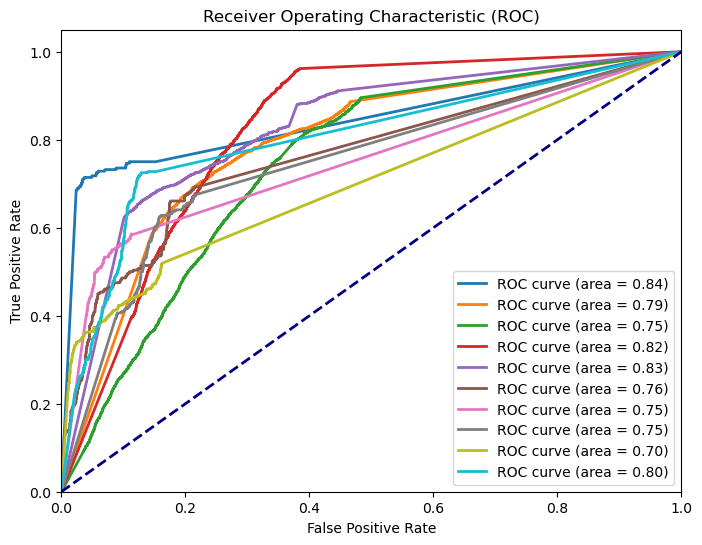

In [41]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probabilities = clf.predict_proba(x_train)
roc_auc_scores = []
plt.figure(figsize=(8, 6))

for i in range(len(unique_labels)):
    fpr, tpr, _ = roc_curve((y_train == unique_labels[i]).astype(int), probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, x_train, y_train, scoring="accuracy", cv=10)

In [45]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(scores)

Scores: [0.19631094 0.19104084 0.39525692 0.46376812 0.35704875 0.40447958
 0.2345191  0.3458498  0.38603426 0.36495389]
Mean: 0.33392621870882744
Standard deviation: 0.08898814947096374


In [46]:
scores = cross_val_score(clf, x_train, y_train, scoring="neg_mean_squared_error", cv=10)

clf_rmse_scores = np.sqrt(-scores)

display_scores(clf_rmse_scores)

Scores: [3.65734232 3.42604917 3.24382458 1.93044398 2.11976706 1.76464323
 1.98196746 1.93725693 2.92731446 3.18500687]
Mean: 2.6173616063454146
Standard deviation: 0.6970750392161897
